# Grabbing Dataset and Visualizing

In [ ]:
!wget https://raw.githubusercontent.com/joyarup/Bank-Marketing-Campaign-Subscription-Prediction/main/dataset_bank.csv #from my github

--2024-02-08 10:34:49--  https://raw.githubusercontent.com/joyarup/Bank-Marketing-Campaign-Subscription-Prediction/main/dataset_bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5834924 (5.6M) [text/plain]
Saving to: ‘dataset_bank.csv’

dataset_bank.csv    100%[===================>]   5.56M  --.-KB/s    in 0.05s   

2024-02-08 10:34:49 (120 MB/s) - ‘dataset_bank.csv’ saved [5834924/5834924]



In [ ]:
#import section
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_csv("/content/dataset_bank.csv", sep=';') #using seperator of ;

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


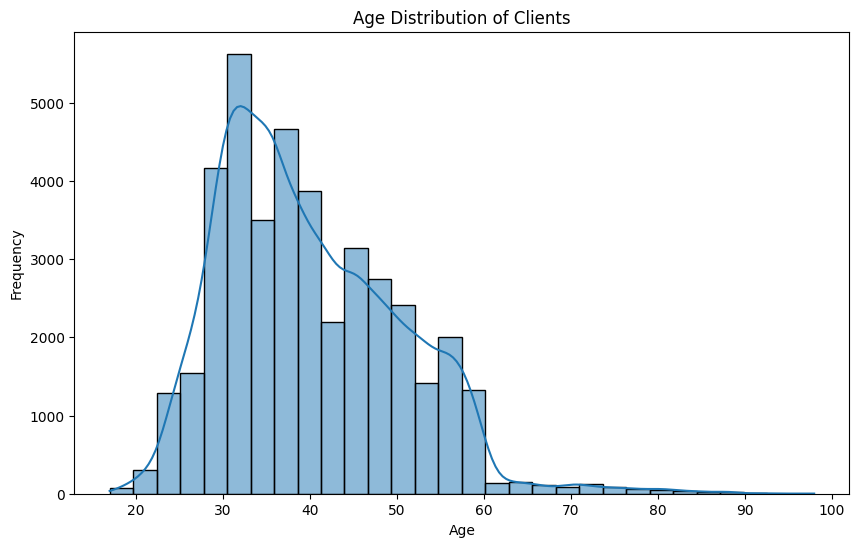

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


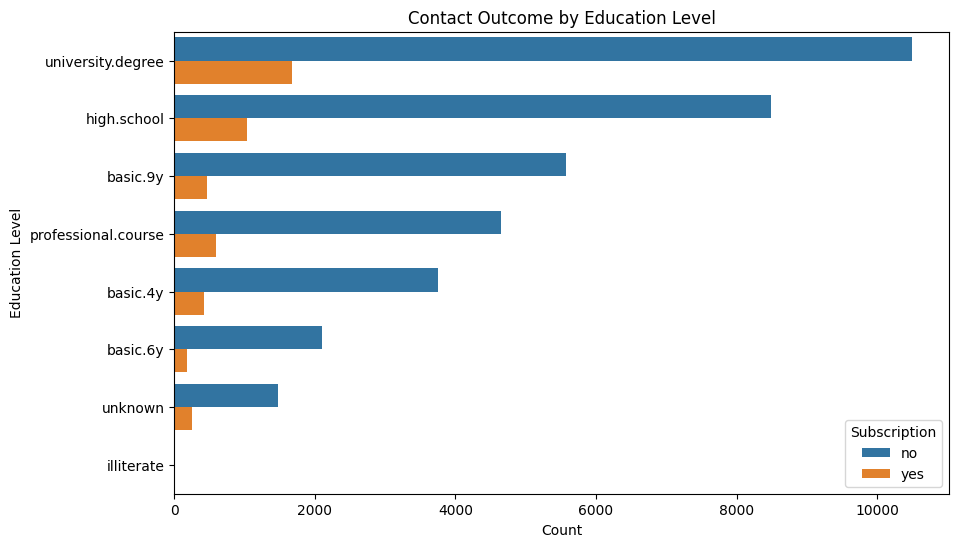

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='education', hue='y', data=data, order=data['education'].value_counts().index)
plt.title('Contact Outcome by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Subscription', loc='lower right')
plt.show()


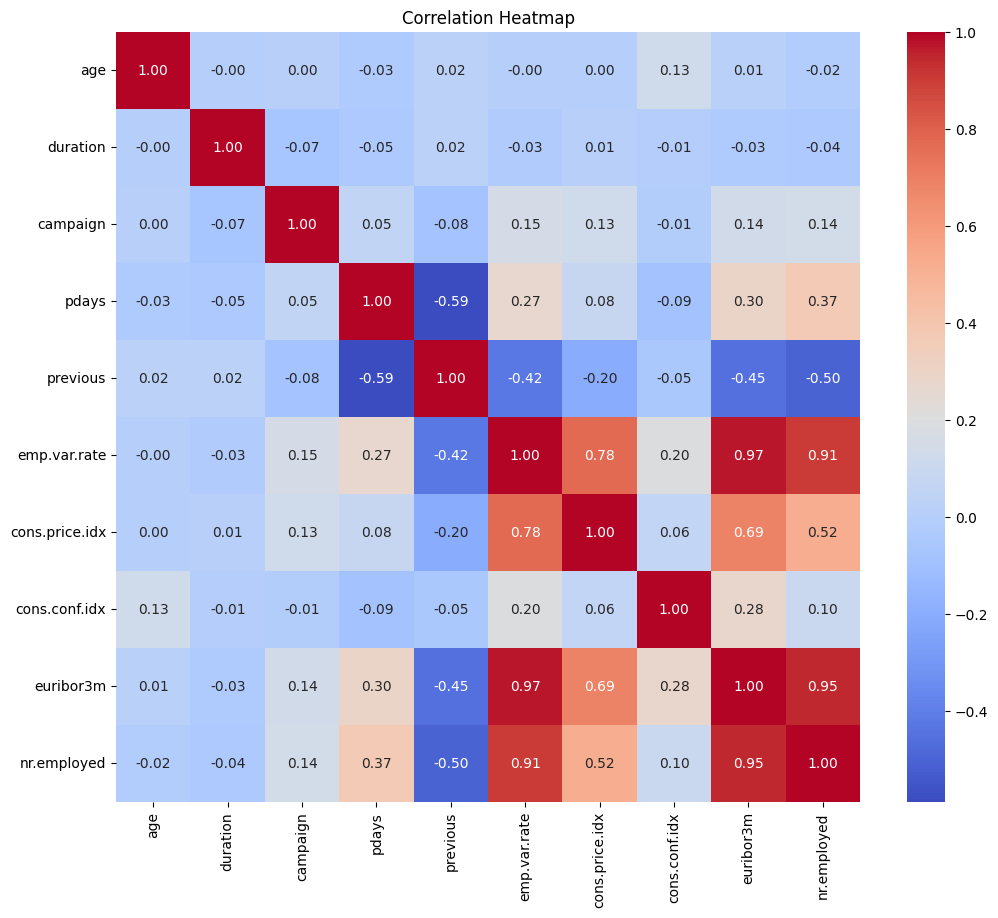

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


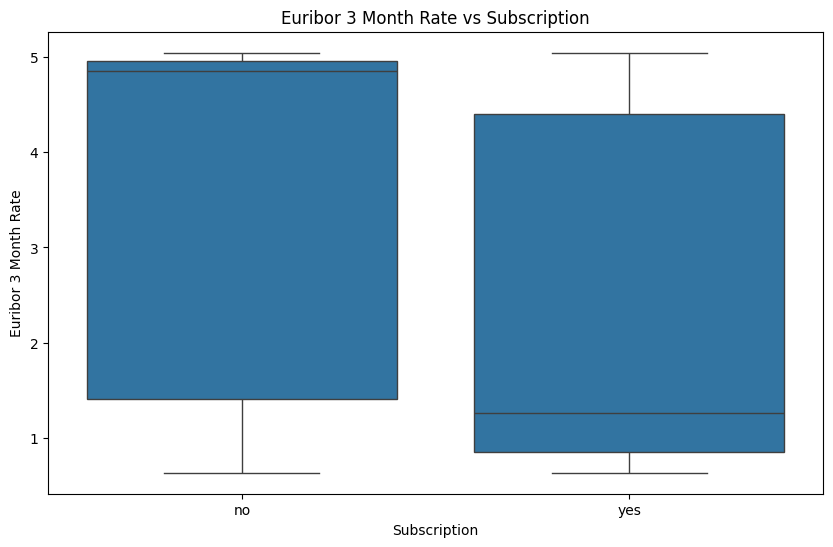

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='euribor3m', data=data)
plt.title('Euribor 3 Month Rate vs Subscription')
plt.xlabel('Subscription')
plt.ylabel('Euribor 3 Month Rate')
plt.show()


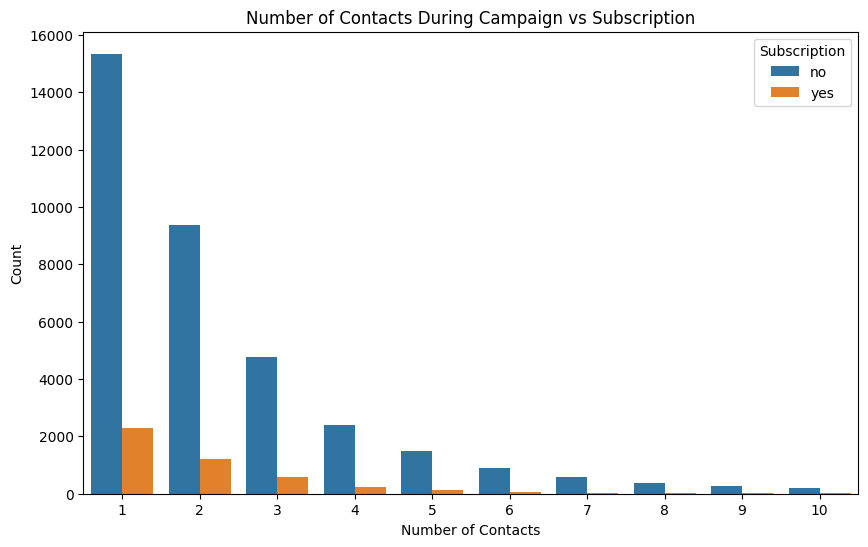

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='campaign', hue='y', data=data[data['campaign'] <= 10])
plt.title('Number of Contacts During Campaign vs Subscription')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.legend(title='Subscription', loc='upper right')
plt.show()


<ipython-input-21-ea60af0d46f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='coolwarm')


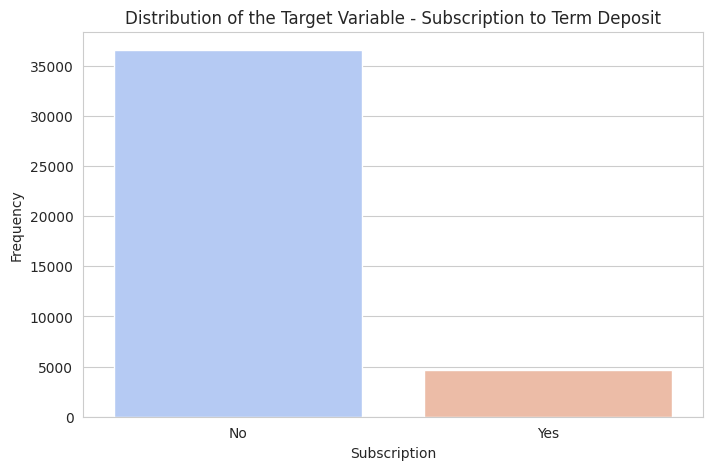

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=data, palette='coolwarm')
plt.title('Distribution of the Target Variable - Subscription to Term Deposit')  #
plt.xlabel('Subscription')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


### One-Hot Encoding for Categorical Variables

In [ ]:
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data.drop('y', axis=1))

# Separate features and target variable
X = data_encoded
y = data['y']

## Oversampling the Minority Class

In [ ]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


Train/Test split of 80/20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

### Decision Tree

In [ ]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)
dt_pred_prob = dt_model.predict_proba(X_test)[:, 1]
# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_pred_prob)

print(f'Decision Tree Model Accuracy: {dt_accuracy:.4f}')
print(f'Decision Tree Model Precision: {dt_precision:.4f}')
print(f'Decision Tree Model Recall: {dt_recall:.4f}')
print(f'Decision Tree Model F1 Score: {dt_f1:.4f}')
print(f'Decision Tree Model ROC AUC Score: {dt_roc_auc:.4f}')

Decision Tree Model Accuracy: 0.9345
Decision Tree Model Precision: 0.9316
Decision Tree Model Recall: 0.9374
Decision Tree Model F1 Score: 0.9345
Decision Tree Model ROC AUC Score: 0.9345


### XGBoost Model

In [ ]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
#xgb_roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'XGBoost Model Accuracy: {xgb_accuracy:.2f}')
print(f'XGBoost Model Accuracy: {xgb_accuracy:.4f}')
print(f'XGBoost Model Precision: {xgb_precision:.4f}')
print(f'XGBoost Model Recall: {xgb_recall:.4f}')
print(f'XGBoost Model F1 Score: {xgb_f1:.4f}')
#print(f'XGBoost Model ROC AUC Score: {xgb_roc_auc:.4f}')


XGBoost Model Accuracy: 0.95
XGBoost Model Accuracy: 0.9512
XGBoost Model Precision: 0.9584
XGBoost Model Recall: 0.9429
XGBoost Model F1 Score: 0.9506


### LightGBM Model

In [ ]:
# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parameters for the model
params = {
    'objective': 'binary',
    'metric': ['binary_logloss', 'auc'],  # Including AUC for a more comprehensive evaluation.
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

# Train the model with early stopping
lgbm_model = lgb.train(params,train_data,num_boost_round=1000, valid_sets=[train_data, test_data])


[LightGBM] [Info] Number of positive: 29260, number of negative: 29216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1777
[LightGBM] [Info] Number of data points in the train set: 58476, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500376 -> initscore=0.001505
[LightGBM] [Info] Start training from score 0.001505


In [ ]:
# Make predictions
y_pred_prob = lgbm_model.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


Accuracy: 0.9514
Precision: 0.9603
Recall: 0.9415
F1 Score: 0.9508
ROC AUC Score: 0.9933


### Ensemble

In [ ]:
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Getting probabilities for the positive class

# Ensemble: Average the predicted probabilities
y_pred_prob_ensemble = (y_pred_prob_xgb + y_pred_prob) / 2

# Convert probabilities to binary predictions based on 0.5 threshold
y_pred_ensemble = np.where(y_pred_prob_ensemble >= 0.5, 1, 0)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = precision_score(y_test, y_pred_ensemble)
ensemble_recall = recall_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)
ensemble_roc_auc = roc_auc_score(y_test, y_pred_prob_ensemble)

# Print the performance metrics for the ensemble model
print(f'Ensemble Model Accuracy: {ensemble_accuracy:.4f}')
print(f'Ensemble Model Precision: {ensemble_precision:.4f}')
print(f'Ensemble Model Recall: {ensemble_recall:.4f}')
print(f'Ensemble Model F1 Score: {ensemble_f1:.4f}')
print(f'Ensemble Model ROC AUC Score: {ensemble_roc_auc:.4f}')


Ensemble Model Accuracy: 0.9515
Ensemble Model Precision: 0.9589
Ensemble Model Recall: 0.9432
Ensemble Model F1 Score: 0.9510
Ensemble Model ROC AUC Score: 0.9934
